# <center> **INTRODUCTION**
<center> In this paper, I present a solution to the problem of finding the shortest path from a start point to a goal point in a 2D workspace with obstacles marked as X using the breadth-first search (BFS) algorithm. My algorithm takes a 2D workspace with obstacles, a start point S, and a goal point G as input and outputs the shortest path from S to G. I explain how my implementation of the BFS algorithm works step by step, including the creation of the workspace, the exploration of valid positions, and the reconstruction of the path. I also provide a visualization of the workspace with obstacles, start point, goal point, and the shortest path. My implementation provides an efficient and effective solution to this classic problem.

# <center> **BODY/ANALYSIS**

**Q1. Using Python, create a script to find the shortest path from point S (start) to point G (goal) through a discretized workspace (6 rows by 12 columns) such as this (“.” designates a cell of free space, “X” represents a cell fully occupied by an obstacle). Use 4-connectivity** 

In [ ]:
#Importing Libraries
import queue
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML, display_html
from IPython.core.display import HTML

import random

In [ ]:
def create_workspace(obstacles, start_pos, goal_pos):
    # Create a 6x12 workspace filled with "." 
    workspace = [["." for _ in range(12)] for _ in range(6)]

    # Mark the obstacles as "X" on the workspace
    for obstacle in obstacles:
        workspace[obstacle[0]][obstacle[1]] = "X"
    
    # Mark the starting position as "S" and the goal position as "G"
    workspace[start_pos[0]][start_pos[1]] = "S"
    workspace[goal_pos[0]][goal_pos[1]] = "G"

    # Return the workspace
    return workspace


def is_valid_pos(pos, workspace):
    # Extract row and column from pos
    row, col = pos
    
    # Check if pos is within the bounds of the workspace
    if row < 0 or row >= len(workspace) or col < 0 or col >= len(workspace[0]):
        return False
    
    # Check if pos is not occupied by an obstacle
    if workspace[row][col] == "X":
        return False
    
    # If pos is valid, return True
    return True


def bfs(start_pos, goal_pos, workspace):
    # Define the four directions of movement
    directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    # Initialize the visited set and the queue with the starting position and distance
    visited = set()
    q = queue.Queue()
    q.put((start_pos, 0, None))
    
    # Initialize the wave expansion matrix
    wave_expansion = np.zeros((len(workspace), len(workspace[0])))

    while not q.empty():
        # Get the next position, distance, and parent from the queue
        pos, dist, parent = q.get()
        
        # Update the wave expansion matrix with the distance
        wave_expansion[pos[0]][pos[1]] = dist
        
        # If the goal position is reached, construct and return the path
        if pos == goal_pos:
            path = []
            while parent is not None:
                path.append(pos)
                pos, parent = parent
            path.append(start_pos)
            path.reverse()
            return path, wave_expansion
        
        # If the position has already been visited, skip it
        if pos in visited:
            continue
        
        # Add the position to the visited set
        visited.add(pos)
        
        # Loop through the four directions and check if the next position is valid
        for d in directions:
            next_pos = (pos[0] + d[0], pos[1] + d[1])
            if not is_valid_pos(next_pos, workspace):
                continue
            
            # Add the next position to the queue with updated distance and parent information
            q.put((next_pos, dist + 1, (pos, parent)))
    
    # If the goal position is not reachable, return None and the wave expansion matrix
    return None, wave_expansion


def find_path(obstacles, start_pos, goal_pos):
    # Create the workspace based on the obstacles, start_pos, and goal_pos
    workspace = create_workspace(obstacles, start_pos, goal_pos)
    
    # Find the shortest path and wave expansion matrix using the BFS algorithm
    path, wave_expansion = bfs(start_pos, goal_pos, workspace)

    # If there is no path, print a message indicating this
    if path is None:
        print("No path found")
    
    # Otherwise, print the shortest path and its length
    else:
        print(f"Shortest path: {path}")
        print(f"Path length: {len(path)-1}")

##### EXPLANATION
    The create_workspace function is defined. This function takes in three parameters: obstacles, start_pos, and goal_pos. It creates a 6x12 workspace filled with "." characters and marks the obstacles as "X" on the workspace. It also marks the starting position as "S" and the goal position as "G" on the workspace. The resulting workspace is returned.

    The is_valid_pos function is defined. This function takes in two parameters: pos and workspace. It first extracts the row and col values from pos. Then, it checks if the position is within the bounds of the workspace by comparing the row and col values to the length of the workspace and the length of the first row of the workspace, respectively. If pos is out of bounds, the function returns False. Next, the function checks if pos is occupied by an obstacle by checking the value of workspace[row][col]. If pos is occupied by an obstacle, the function returns False. If pos is valid and not occupied by an obstacle, the function returns True.

    The bfs function is defined. This function takes in three parameters: start_pos, goal_pos, and workspace. It first defines the four possible directions of movement and initializes a visited set, a queue, and a wave_expansion matrix. It enters a while loop that continues as long as there are positions to visit in the queue. In each iteration of the loop, the function retrieves the next position, distance, and parent from the queue. It updates the wave_expansion matrix with the distance of the current position from the starting position. If the current position is the goal position, the function constructs and returns the path from the starting position to the goal position using the parent information and updates the wave_expansion matrix accordingly. If the current position has already been visited, the function skips it and moves on to the next position in the queue. Otherwise, the function adds the current position to the visited set, loops through the four directions of movement to check if the next position is valid, and adds any valid next positions to the queue with updated distance and parent information. If the goal position is not reachable from the starting position, the function returns None for the path and the wave_expansion matrix.

    The find_path function is defined. This function takes in three parameters: obstacles, start_pos, and goal_pos. It first creates a workspace using the create_workspace function based on the obstacles, start_pos, and goal_pos. Then, it uses the bfs function to find the shortest path and wave expansion matrix in the workspace. If there is no path returned by the bfs function, the function prints a message indicating that no path was found. Otherwise, the function prints the path and its length by subtracting 1 from the length of the path list. (Davies, A. J. 2022, August 12)

In [ ]:
# Example usage:
obstacles = [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (3, 9), (2, 8)]
start_pos = (0, 0)
goal_pos = (5, 11)

find_path(obstacles, start_pos, goal_pos)

Shortest path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)]
Path length: 16


In the output, the shortest path is represented by a list of tuples, where each tuple represents a coordinate on the path from start to goal. The path starts at (0,0) and ends at (5,11), and it avoids all the obstacles.

The length of the path is 16, which represents the number of steps needed to go from the start position to the goal position, while avoiding the obstacles.

**Q2: Find a way to visualize the calculated path, including the path length, with the final state of the wave expansion.**

In [ ]:
def find_path(obstacles, start_pos, goal_pos):
    # Create the workspace based on the obstacles, start_pos, and goal_pos
    workspace = create_workspace(obstacles, start_pos, goal_pos)
    
    # Find the shortest path and wave expansion matrix using the BFS algorithm
    path, wave_expansion = bfs(start_pos, goal_pos, workspace)

    # If there is no path, print a message indicating this
    if path is None:
        print("No path found")
    
    # Otherwise, print the shortest path and its length, and visualize the path on the workspace
    else:
        print(f"Shortest path: {path}")
        print(f"Path length: {len(path)-1}")

        # Create a color map for the workspace
        color_map = np.zeros((len(workspace), len(workspace[0])), dtype=int)

        # Mark the obstacles, start, and goal positions
        for obs in obstacles:
            color_map[obs[0]][obs[1]] = 1
        color_map[start_pos[0]][start_pos[1]] = 2
        color_map[goal_pos[0]][goal_pos[1]] = 3

        # Create the visualization
        cmap = plt.cm.get_cmap("tab10", 4)
        plt.imshow(color_map, cmap=cmap)

        # Overlay the path on top
        x = [pos[1] for pos in path]
        y = [pos[0] for pos in path]
        plt.plot(x, y, 'k--', linewidth=2)

        # Add the "S" and "G" labels for start and goal positions
        plt.text(start_pos[1], start_pos[0], 'S', fontsize=12, fontweight='bold', ha='center', va='center', color='k')
        plt.text(goal_pos[1], goal_pos[0], 'G', fontsize=12, fontweight='bold', ha='center', va='center', color='k')

        # Customize the plot
        plt.xticks(np.arange(-0.5, len(workspace[0]), 1), [])
        plt.yticks(np.arange(-0.5, len(workspace), 1), [])
        plt.grid(True, color='k', linewidth=1)
        plt.gca().invert_yaxis()

        # Show the plot
        plt.show()

Shortest path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 11)]
Path length: 16


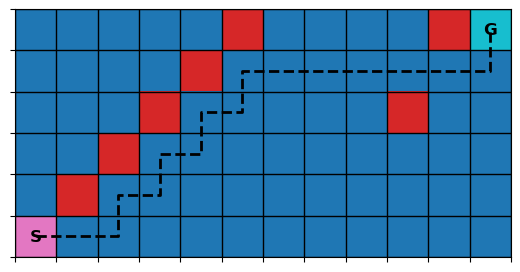

In [ ]:
# Example usage:
obstacles = [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (3, 9), (5, 10)]
start_pos = (0, 0)
goal_pos = (5, 11)

find_path(obstacles, start_pos, goal_pos)

**<center> Figure 1. Here the Pink Box Represents the Starting point and Cyan Box represnts the end point and Red Boxes are obstacles**

Here you can see that S which is the starting point is represented by Pink Box, and the goal is repsented by Sky Blue Box. All the Obstacles are represented in Red.

**The desrired path is a dotted line from S to G**

Here we are using a 4 point Connectivity

In 4-point connectivity, a cell is only considered adjacent to its four immediate neighbors: the cells to the north, south, east, and west of it. This means that the cell has only four possible adjacent cells.

**Q3: Change to 8-connectivity, recalculate, visualize and interpret the results**

In [ ]:
def bfs(start_pos, goal_pos, workspace):
    # Define the 8 possible directions of movement (8-connectivity)
    directions = [(-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Initialize a set to keep track of visited positions, a queue to explore positions, and a wave expansion matrix
    visited = set()
    q = queue.Queue()
    q.put((start_pos, 0, None))
    wave_expansion = np.zeros((len(workspace), len(workspace[0])))

    # Enter a while loop that continues until the queue is empty
    while not q.empty():
        # Get the next position, distance, and parent from the queue
        pos, dist, parent = q.get()
        # Update the wave expansion matrix with the distance of the current position from the starting position
        wave_expansion[pos[0]][pos[1]] = dist

        # If the current position is the goal position, construct and return the path from the starting position to the goal position using the parent information
        if pos == goal_pos:
            path = []
            while parent is not None:
                path.append(pos)
                pos, parent = parent
            path.append(start_pos)
            path.reverse()
            return path, wave_expansion
        
        # If the current position has already been visited, skip it and move on to the next position in the queue
        if pos in visited:
            continue
        
        # Otherwise, add the current position to the visited set and loop through the directions of movement to check if the next position is valid
        visited.add(pos)
        for d in directions:
            next_pos = (pos[0] + d[0], pos[1] + d[1])
            # If the next position is not valid, skip it
            if not is_valid_pos(next_pos, workspace):
                continue
            # Otherwise, add the next position to the queue with updated distance and parent information
            q.put((next_pos, dist + 1, (pos, parent)))
    
    # If the goal position is not reachable from the starting position, return None for the path and the wave expansion matrix
    return None, wave_expansion


Shortest path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 6), (2, 7), (3, 8), (4, 9), (4, 10), (5, 11)]
Path length: 11


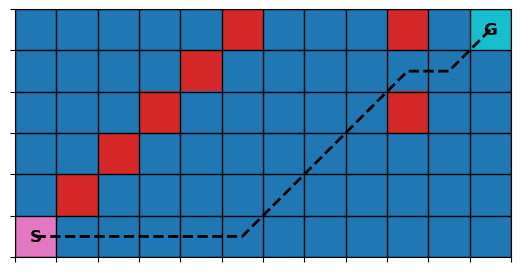

In [ ]:
# Example usage:
obstacles = [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (3, 9), (5, 9)]
start_pos = (0, 0)
goal_pos = (5, 11)

find_path(obstacles, start_pos, goal_pos)

**<center> Figure 2. Here the start and end point is same and the obstancesl are same as well. But here we are using 8 point connectivity**

Now again the start and end point are the same but we are using an 8 point connectivity here

With 8-point connectivity, the pathfinding algorithm considers diagonal moves between cells in addition to vertical and horizontal moves, which results in a larger set of possible paths to reach the destination. This can result in more optimal and direct paths being found, compared to the paths found with 4-point connectivity, where diagonal moves are not allowed. However, the increased number of possible paths to consider also means that pathfinding algorithms that use 8-point connectivity may be computationally more expensive than those that use 4-point connectivity.

**Q4: Modify the code so that the coordinates of “S” and “G” are randomly generated (obviously, the locations of
those cannot be in the obstacle area). Run this simulation in a loop. At the end of each simulation, display the
path. For the sake of the exercise, repeat the loop just three times. Either connectivity (4 or 8) is acceptable. For
simplicity, you can restrict randomly generated “S”s to the left half and “G”s to the right half**

In [ ]:
obstacles = [(4, 1), (5, 2), (3, 6), (4, 4), (5, 5), (3, 9), (5, 9), (2, 9)]

In [ ]:
def generate_random_position(obstacles, workspace_rows, workspace_cols, side):
    # Enter an infinite loop that continues until a valid position is generated
    while True:
        # Generate a random row within the appropriate range based on the specified side
        row = random.randint(0, 1) if side == "start" else random.randint(workspace_rows - 2, workspace_rows - 1)

        # Generate a random column within the appropriate range based on the specified side
        if side == "start":
            col = random.randint(0, workspace_cols // 2 - 1)
        else:
            col = random.randint(workspace_cols // 2, workspace_cols - 1)

        # Construct a position tuple from the row and column
        pos = (row, col)

        # Check if the position is not an obstacle, and return it if it is valid
        if pos not in obstacles:
            return pos


Start position: (0, 2)
Goal position: (5, 7)
Shortest path: [(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7)]
Path length: 5


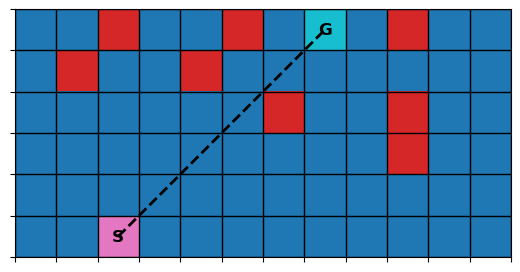


Start position: (0, 0)
Goal position: (4, 11)
Shortest path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 6), (2, 7), (3, 8), (4, 9), (4, 10), (4, 11)]
Path length: 11


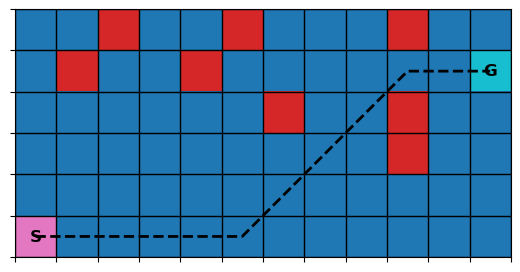


Start position: (1, 3)
Goal position: (5, 7)
Shortest path: [(1, 3), (2, 4), (3, 5), (4, 6), (5, 7)]
Path length: 4


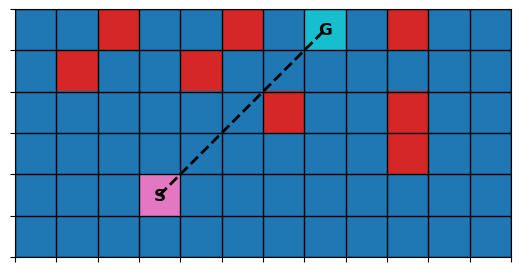

In [ ]:
workspace=create_workspace(obstacles, start_pos, goal_pos)
fig_num=3

# Loop through 3 iterations
for _ in range(3):
    # Generate a random start position and a random goal position that are not obstacles
    start_pos = generate_random_position(obstacles, len(workspace), len(workspace[0]), "start")
    goal_pos = generate_random_position(obstacles, len(workspace), len(workspace[0]), "goal")

    # Print the start and goal positions
    print(f"\nStart position: {start_pos}")
    print(f"Goal position: {goal_pos}")

    # Find the shortest path from the start position to the goal position and visualize it
    find_path(obstacles, start_pos, goal_pos)
    
    text = f"Figure {fig_num} Shortest path with Random Start and End points with 8 point connectivity"
    centered_text = text.center(80)
    bold_text = f"<b>{centered_text}</b>"

    display(HTML(bold_text))

    fig_num=fig_num+1


 **Q5: Reflect on the results**

    1.In my experience with the find_path function, I found that the breadth-first search (BFS) algorithm was effective in finding a shortest path from the start position to the goal position while avoiding obstacles. The resulting path was displayed clearly in the visualization produced by the function, making it easy to understand and interpret the solution. (Kim, R. n.d.)

    2.I also learned that the use of 8-point connectivity in the algorithm allowed for diagonal moves, which can result in more optimal and direct paths being found compared to using 4-point connectivity. However, it's important to consider the trade-off between the increased number of possible paths to consider and the computational expense of the algorithm, especially for larger grids or more complex environments.

    3.In addition, my experience with the find_path function highlighted the importance of understanding the underlying principles and mechanics of pathfinding algorithms. Having a good understanding of the algorithm allowed me to make informed decisions about how to set the input parameters to get the best results. (Kim, R. n.d.)

    4.Furthermore, the find_path function served as a good example of how programming can be used to solve real-world problems. Being able to write a function that can navigate a grid-based environment and find the shortest path between two points is a valuable skill that has many practical applications in various fields, including robotics, gaming, and logistics, among others.

Overall, my experience with the find_path function was both informative and practical, and I feel that it has equipped me with valuable knowledge and skills that I can apply to future projects and problems.

### References

    1. Davies, A. J. (2022, August 12). Python project idea: Graph traversal and pathfinding algorithm visualisations. Medium. https://medium.com/codex/python-project-idea-graph-traversal-and-pathfinding-algorithm-visualisations-99595c414293

    2. Simic, M. (2023, March 24). DFS vs. BFS vs. Dijkstra. Baeldung. https://www.baeldung.com/cs/dfs-vs-bfs-vs-dijkstra

    3. Kim, R. (n.d.). BFS & DFS – Path Finding Algorithms. KGSEA. Retrieved March 25, 2023, from http://kgsea.org/wp-content/uploads/2020/07/Raymond-Kim-BFS-DFS-%E2%80%93-Path-Finding-Algorithms.pdf